In [165]:
"""
This is a jupyter notebook to explore RESOLVE and ECO. My mini-project will be to compare the u-r color vs. stellar
mass plot for RESOLVE and ECO, knowing that the u-r color is defined differently in the two surveys (the ECO glossary says
"modelu_rcorr" is corrected for internal extinction by the host galaxy, whereas the RESOLVE glossary says "modelu_r"  
has only "foreground corrections" meaning corrections for extinction by dust in our own Galaxy).
Author: Sheila Kannappan
Created: August 2016
"""

# standard imports and naming conventions; uncomment as needed
import numpy as np              # basic numerical analysis
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats     # statistical functions
from astroML.plotting import scatter_contour

%matplotlib inline

In [166]:
data = np.genfromtxt("ECO_dr1_subsetmini.csv", delimiter=",", dtype=None, names=True) # better than np.loadtxt if have column names

In [167]:
data.dtype.names

('NAME', 'CZ', 'LOGMSTAR', 'LOGMH', 'RADEG', 'DEDEG', 'GRPCZ', 'CCR', 'CCB')

In [168]:
logmstar = data['LOGMSTAR'] #Log Stellar Mass
logmh = data['LOGMH'] #Log Halo Mass
grpcz = data['GRPCZ'] #Velocity of Group Center (km/s)
cz = data['CZ'] #Local group corrected velocity (km/s)
z = data['CCR']
raDeg = data['RADEG'] #Right ascension in degrees
deDeg = data['DEDEG'] #Declination in Degrees


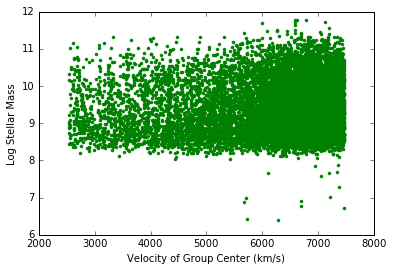

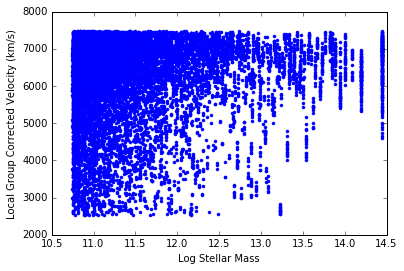

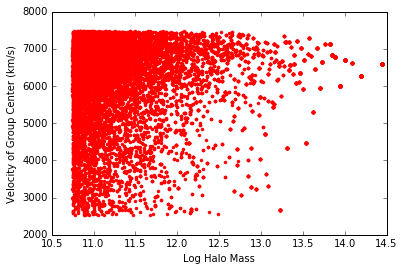

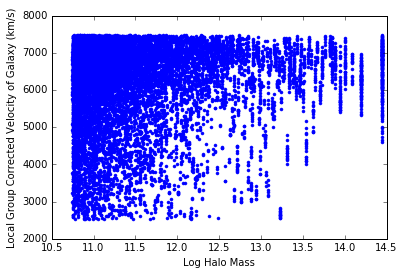

In [169]:
fig, ax = plt.subplots()

ax = plt.axes()
ax.plot(grpcz, logmstar, 'g.')
ax.set_ylabel("Log Stellar Mass")
ax.set_xlabel("Velocity of Group Center (km/s)")

fig, ax = plt.subplots()
ax = plt.axes()
ax.plot(logmh, cz, 'b.')
ax.set_xlabel("Log Stellar Mass")
ax.set_ylabel("Local Group Corrected Velocity (km/s)")

fig, ax = plt.subplots()
ax = plt.axes()
ax.plot(logmh,grpcz, 'r.')
ax.set_xlabel("Log Halo Mass")
ax.set_ylabel("Velocity of Group Center (km/s)")

fig, ax = plt.subplots()
ax = plt.axes()
ax.plot(logmh,cz, 'b.')
ax.set_xlabel("Log Halo Mass")
ax.set_ylabel("Local Group Corrected Velocity of Galaxy (km/s)")

(-0.998, 49.844999999999999)

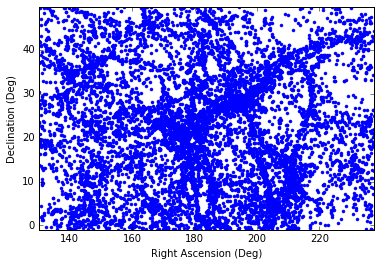

In [170]:
fig, ax = plt.subplots()
ax = plt.axes()
ax.plot(raDeg,deDeg, 'b.')
ax.set_xlabel("Right Ascension (Deg)")
ax.set_ylabel("Declination (Deg)")
ax.set_xlim(np.min(raDeg),np.max(raDeg))
ax.set_ylim(np.min(deDeg),np.max(deDeg))